Maxime BLANCHON

#### *Programmation sur Grille de Calcul - Générateurs de Variables Aléatoires*

# TP3 - Méthodes de Monte-Carlo

↓ Import des bibliothèques utilisées dans les exercices ↓

In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from typing import Callable, List, Tuple
from itertools import repeat
import seaborn as sns

## Exercice 1

Approximation de $\pi$ avec la méthode du "hit or miss" :

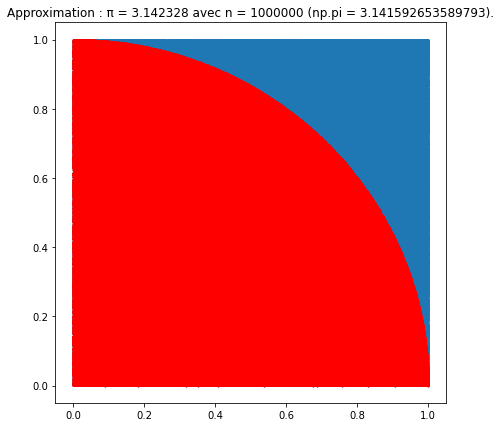

3.142328

In [2]:
SIZES = [100, 1000, 10_000, 50_000, 100_000, 500_000, 1_000_000]


def hit_or_miss(n: int, plot: bool = False) -> float:
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)

    is_inside = x ** 2 + y ** 2 < 1
    approx_pi = 4 * np.sum(is_inside) / n

    if plot:
        x_in = x[is_inside]
        y_in = y[is_inside]

        plt.figure(figsize=[7, 7])
        plt.scatter(x, y, s=1)
        plt.scatter(x_in, y_in, color="r", s=1)
        plt.title(f"Approximation : π = {approx_pi} avec n = {n} (np.pi = {np.pi}).")
        plt.show()

    return approx_pi


hit_or_miss(1_000_000, plot=True)

In [3]:
def plot_error_function(approximations: List[float], errors: List[float], title: str) -> None:
    sizes_log = np.log(SIZES)
    plt.scatter(sizes_log, errors, facecolors='none', edgecolors='b', linewidths=2, label=f'Calculée')
    plt.plot(sizes_log, approximations, color='r', label=f'Théorique')
    plt.scatter(sizes_log, approximations, facecolors='none', edgecolors='r', linewidths=2)
    plt.xlabel("Taille de l'échantillon (log)")
    plt.ylabel("Erreur")
    plt.legend()
    plt.title(title)

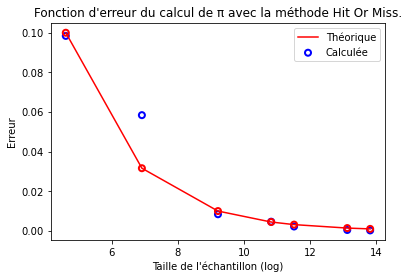

In [4]:
hm_approximations = []
hm_errors = []

for size in SIZES:
    approx = hit_or_miss(size)
    hm_errors.append(abs(approx - np.pi))
    hm_approximations.append(1 / sqrt(size))

plot_error_function(hm_approximations, hm_errors, "Fonction d'erreur du calcul de π avec la méthode Hit Or Miss.")

## Exercice 2



**Question 1 :**

En effectuant les changements de variables suivant :
- $u=arcsin(x)$,
- $du = \frac {1} {\sqrt {1 - x^2}}$,

nous trouvons $J = 0.602845$.

In [5]:
# J reference value
J_VALUE = 0.602845

**Question 2 :**

In [6]:
def integral_j(x: float) -> float:
    return (1 / 2) * (np.exp(np.arcsin(x))) * (x / np.sqrt(1 - (x ** 2)))


def monte_carlo(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b))
    return (b - a) * mc_sum / n


print(f'[Monte Carlo] Estimation : J = {monte_carlo(0.1, 0.9, 100_000, integral_j)} (pour n = {100_000})')

[Monte Carlo] Estimation : J = 0.604752690588123 (pour n = 100000)


**Question 3 :**

In [7]:
f_monte_carlo = []
for n in SIZES:
    res = monte_carlo(0.1, 0.9, n, integral_j)
    f_monte_carlo.append(res)
    print(f'[Monte Carlo] Estimation : J = {res}  (pour n = {n})')

[Monte Carlo] Estimation : J = 0.5734367553742689  (pour n = 100)
[Monte Carlo] Estimation : J = 0.5997235283930352  (pour n = 1000)
[Monte Carlo] Estimation : J = 0.6038143370156933  (pour n = 10000)
[Monte Carlo] Estimation : J = 0.6003161129111793  (pour n = 50000)
[Monte Carlo] Estimation : J = 0.6046946584179046  (pour n = 100000)
[Monte Carlo] Estimation : J = 0.6030025329469509  (pour n = 500000)
[Monte Carlo] Estimation : J = 0.6016838197992174  (pour n = 1000000)


On peut voir qu'en fonction du nombre de valeurs simulées $n$, la valeur de l'intégrale J converge vers la valeur de référence, calculée à la question 1.

**Question 4 :**

In [8]:
def rectangles_method(a: float, b: float, n: int, f: Callable) -> float:
    rec_sum = 0
    h = (b - a) / n

    for k in range(n - 1):
        rec_sum += f(a + k * h)

    return h * rec_sum

In [9]:
f_rectangle = []
for n in SIZES:
    res = rectangles_method(0.1, 0.9, n, integral_j)
    f_rectangle.append(res)
    print(f'[Rectangles Method] Estimation : J = {res}  (pour n = {n})')

[Rectangles Method] Estimation : J = 0.5667942925845  (pour n = 100)
[Rectangles Method] Estimation : J = 0.5990893619507717  (pour n = 1000)
[Rectangles Method] Estimation : J = 0.6024682238648716  (pour n = 10000)
[Rectangles Method] Estimation : J = 0.6027699557026537  (pour n = 50000)
[Rectangles Method] Estimation : J = 0.6028076882127177  (pour n = 100000)
[Rectangles Method] Estimation : J = 0.6028378767870706  (pour n = 500000)
[Rectangles Method] Estimation : J = 0.6028416505193059  (pour n = 1000000)


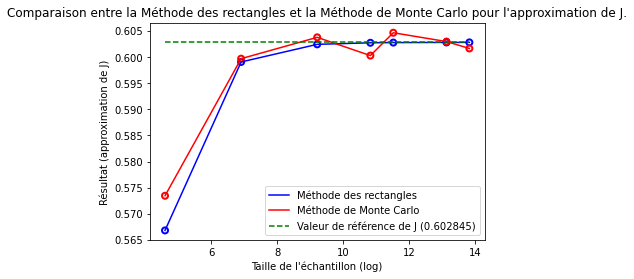

In [10]:
def compare_methods(f1: List[float], f1_label: str, f2: List[float], f2_label: str, i_value: float,
                    i_name: str) -> None:
    sizes_log = np.log(SIZES)
    plt.plot(sizes_log, f1, color='blue', label=f1_label)
    plt.scatter(sizes_log, f1, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, f2, color='red', label=f2_label)
    plt.scatter(sizes_log, f2, facecolors='none', edgecolors='r', linewidths=2)
    line = list(repeat(i_value, len(SIZES)))
    plt.plot(sizes_log, line, linestyle='dashed', color='green',
             label=f'Valeur de référence de {i_name} ({i_value})')
    plt.xlabel("Taille de l'échantillon (log)")
    plt.ylabel(f"Résultat (approximation de {i_name})")
    plt.legend()
    plt.title(f"Comparaison entre la {f1_label} et la {f2_label} pour l'approximation de {i_name}.")


compare_methods(f_rectangle, 'Méthode des rectangles',
                f_monte_carlo, 'Méthode de Monte Carlo',
                J_VALUE, 'J')

La méthode de quadrature (dans notre cas la méthode des rectangles) converge plus rapidement vers la valeur de référence de J que la méthode de Monte Carlo.

**Question 5 :**

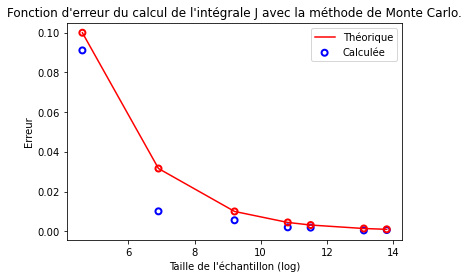

In [11]:
mc_approximations = []
mc_errors = []

for size in SIZES:
    approx = monte_carlo(0.1, 0.9, size, integral_j)
    error = abs(approx - J_VALUE)
    mc_errors.append(error)
    mc_approximations.append(1 / sqrt(size))

plot_error_function(mc_approximations, mc_errors,
                    "Fonction d'erreur du calcul de l'intégrale J avec la méthode de Monte Carlo.")

**Question 6 :**

In [12]:
def batches_method(m: int, n: int) -> Tuple[List[float], float]:
    batch_len = int(n / m)
    batches = []

    for i in range(m):
        batches.append(monte_carlo(0.1, 0.9, batch_len, integral_j))

    return batches, sum(batches) / m


M = 5000
N = 1_000_000
batches, avg = batches_method(M, N)
print(f'[Batches Method] Estimation : J = {avg}  (pour M = {M}, N = {N})')

[Batches Method] Estimation : J = 0.6029704567898129  (pour M = 5000, N = 1000000)


Text(0.5, 1.0, 'Histogramme et courbe de densité des valeurs de J obtenues avec la méthode des "batchs".')

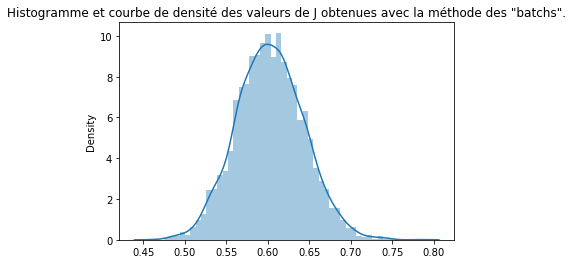

In [13]:
sns.distplot(batches)
plt.title('Histogramme et courbe de densité des valeurs de J obtenues avec la méthode des "batchs".')

On peut voir que la somme des variables générées par la méthode des batchs converge vers une loi gaussienne. On est en présence du théorème central limite.

**Question 7 :**

In [14]:
# J estimator
def stratification_method(f: Callable, a: float, b: float, n: int, n_intervals: int):
    # generate intervals
    step = (b - a) / n_intervals
    intervals = [a]
    for i in range(1, n_intervals + 1):
        intervals.append(intervals[-1] + step)

    res = []
    for i in range(len(intervals) - 1):
        res.append(monte_carlo(intervals[i], intervals[i + 1], n, f))

    return np.var(res), sum(res)


var, res = stratification_method(integral_j, 0.1, 0.9, 10_000, 100)
print(f'[Stratification Method] Espérance = {res}, Variance = {var}')

[Stratification Method] Espérance = 0.6028374489158509, Variance = 3.2928029329561146e-05


In [15]:
# Initial variance
def integral_j_bis(x: float) -> float:
    return (1 / 4) * (np.exp(2 * np.arcsin(x))) * (x ** 2 / (1 - (x ** 2)))


monte_carlo(0.1, 0.9, 10_000, integral_j_bis) - (J_VALUE ** 2)

0.5148984775451577

En utilisant la méthode de la stratification on obtient un estimateur de J dont la variance est inférieure à la variance initiale. Ainsi, on peut toujours construire un estimateur stratifié plus efficace que l’estimateur de Monte Carlo classique, au sens où il est de variance plus faible.

## Exercice 3

**Question 1 :**

La valeur de l'intégrale I est 0.159491.

In [16]:
# I reference value
I_VALUE = 0.159491

**Question 2 :**

In [17]:
SIZES = [100, 1000, 10_000] # reduce sizes for cubature method, because it uses a lot of RAM.

def integral_i(x: int, y: int) -> float:
    return x * y * np.sin(1 / (x * y)) ** 2


def monte_carlo_bidimensional(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b), np.random.uniform(a, b))
    return (b - a) * mc_sum / n


print(f'[Monte Carlo] Estimation : I = {monte_carlo_bidimensional(0, 1, 100_000, integral_i)} (pour n = {100_000})')

[Monte Carlo] Estimation : I = 0.15964271524537663 (pour n = 100000)


**Question 3 :**

In [18]:
f_monte_carlo_bi = []
for n in SIZES:
    res = monte_carlo_bidimensional(0, 1, n, integral_i)
    f_monte_carlo_bi.append(res)
    print(f'[Monte Carlo] Estimation : I = {res} (pour n = {n})')

[Monte Carlo] Estimation : I = 0.13670352489290616 (pour n = 100)
[Monte Carlo] Estimation : I = 0.1608334110341346 (pour n = 1000)
[Monte Carlo] Estimation : I = 0.16041584351820243 (pour n = 10000)


On peut voir qu'en fonction du nombre de valeurs simulées $n$, la valeur de l'intégrale I converge vers la valeur de référence, calculée à la question 1.

**Question 4 :**

[Cubature Method] Estimation : I = 0.15566905887871837  (pour n = 100)
[Cubature Method] Estimation : I = 0.1591055329775277  (pour n = 1000)
[Cubature Method] Estimation : I = 0.15945294248866315  (pour n = 10000)


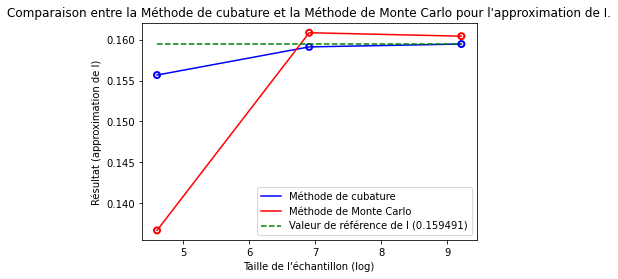

In [19]:
def cubature_method(n):
    def g(x, y):
        return (x * y * dx * dx) * (np.sin(1 / (x * y * dx * dx))) ** 2

    dx = 1 / n
    res = np.fromfunction(g, (n, n))
    res = res[~np.isnan(res)]
    return abs(res.sum() * (1 / n) ** 2)


m_cubature = []
for n in SIZES:
    res = cubature_method(n)
    m_cubature.append(res)
    print(f'[Cubature Method] Estimation : I = {res}  (pour n = {n})')

compare_methods(m_cubature, 'Méthode de cubature',
                f_monte_carlo_bi, 'Méthode de Monte Carlo',
                I_VALUE, "I")

La méthode de cubature converge plus rapidement vers la valeur de référence de I que la méthode de Monte Carlo.

**Question 5 :**

Nombre de tirages n = 100, erreur numérique = 0.02777024128938843
Nombre de tirages n = 1000, erreur numérique = 0.013354450918372673
Nombre de tirages n = 10000, erreur numérique = 0.0034154392363633657


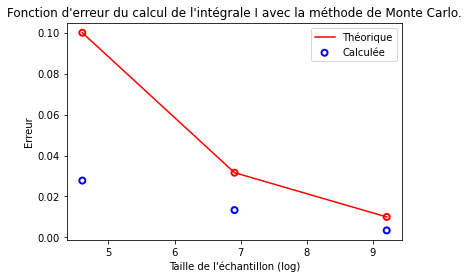

In [20]:
mcb_approximations = []
mcb_errors = []

for size in SIZES:
    approx = monte_carlo_bidimensional(0, 1, size, integral_i)
    error = abs(approx - I_VALUE)
    mcb_errors.append(error)
    mcb_approximations.append(1 / sqrt(size))
    print(f'Nombre de tirages n = {size}, erreur numérique = {error}')

plot_error_function(mcb_approximations, mcb_errors,
                    "Fonction d'erreur du calcul de l'intégrale I avec la méthode de Monte Carlo.")

**Question 6 :**

In [21]:
def batches_method(m: int, n: int) -> Tuple[List[float], float]:
    batch_len = int(n / m)
    batches = []

    for i in range(m):
        batches.append(monte_carlo_bidimensional(0, 1, batch_len, integral_i))

    return batches, sum(batches) / m


M = 5000
N = 1_000_000
batches, avg = batches_method(M, N)
print(f'[Batches Method] Estimation : I = {avg}  (pour M = {M}, N = {N})')

[Batches Method] Estimation : I = 0.15904958900564878  (pour M = 5000, N = 1000000)


Text(0.5, 1.0, 'Histogramme et courbe de densité des valeurs de I obtenues avec la méthode des "batchs".')

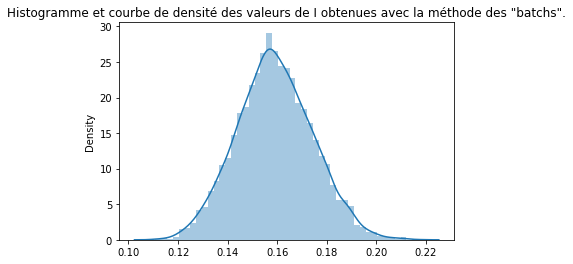

In [22]:
sns.distplot(batches)
plt.title('Histogramme et courbe de densité des valeurs de I obtenues avec la méthode des "batchs".')

On peut voir que la somme des variables générées par la méthode des batchs converge vers une loi gaussienne. On est en présence du théorème central limite.